In [48]:
#데이터 프레임 생성하기

import numpy as np
import pandas as pd

# 두 개의 시리즈 데이터가 있습니다.
population_dict = {
    'korea': 5180,
    'japan': 12718,
    'china': 141500,
    'usa': 32676
}
population = pd.Series(population_dict)

gdp_dict = {
    'korea': 169320000,
    'japan': 516700000,
    'china': 1409250000,
    'usa': 2041280000,
}
gdp = pd.Series(gdp_dict)

# 이곳에서 2개의 시리즈 값이 들어간 데이터프레임을 생성합니다.
df = pd.DataFrame({'population':population,'gdp':gdp})

# 데이터 프레임에 gdp per capita 칼럼을 추가하고 출력합니다.
df['gdp per capita'] = df['gdp']/df['population']

# 데이터 프레임을 만들었다면, index와 column도 각각 확인해보세요.
df.index
df.columns

Index(['population', 'gdp', 'gdp per capita'], dtype='object')

In [53]:
# 데이터 프레임 연산

A = pd.DataFrame(np.random.randint(0, 10, (2, 2)), columns=['A', 'B'])      #칼럼이 A, B입니다.
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=['B', 'A', 'C'])     #칼럼이 B, A, C입니다.

(A+B).dropna()
(A+B).fillna(5)
A.add(B,fill_value=0)
A.div(B,fill_value=-1)

,A,B,C
0,inf,0.875,-0.200000
1,1.00,inf,-0.166667
2,-0.25,-0.200,-0.333333


In [58]:
# 데이터 프레임 정렬하기

df = pd.DataFrame({
    'col1' : [2, 1, 9, 8, 7, 4],
    'col2' : ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col3': [0, 1, 9, 4, 2, 3],
})

# 정렬 코드 입력해보기    
# Q1. col1을 기준으로 오름차순으로 정렬하기.
df.sort_values(['col1'], ascending=True)

# Q2. col2를 기준으로 내림차순으로 정렬하기.
df.sort_values(['col2'], ascending=False)

# Q3. col2를 기준으로 오름차순으로, col1를 기준으로 내림차순으로 정렬하기.
df.sort_values(['col1','col2'], ascending=[True,False])

,col1,col2,col3
1,1,A,1
0,2,A,0
5,4,C,3
4,7,D,2
3,8,NaN,4
2,9,B,9


In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(5,2), columns=['A','B'])

#데이터 프레임에서 A컬럼값이 0.5보다 작고 B컬럼 값이 0.3보다 큰값들을 구해봅시다.

# 마스킹 연산
df.loc[(df['A'] < 0.5) & (df['B'] > 0.3)]

# query 이용
df.query('(A<0.5) and (B>0.3)')

In [2]:
df = pd.DataFrame(np.arange(5), columns=['Num'])
#함수 적용하여 데이터 처리하기

# 값을 받으면 제곱을 해서 돌려주는 함수
def square(x) :
    return x**2

# apply로 컬럼에 함수 적용
df['Num'].apply(square)

# 람다 표현식으로도 적용하기
df.Num.apply(lambda x: x**2)

0     0
1     1
2     4
3     9
4    16
Name: Num, dtype: int64

In [3]:
# group으로 묶기

df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1': [1, 2, 3, 1, 2, 3],
    'data2': [4, 4, 6, 0, 6, 1]
})

# groupby 함수를 이용해봅시다.
# key를 기준으로 묶어 합계를 구해 출력해보세요.
print(df.groupby('key').sum())

# key와 data1을 기준으로 묶어 합계를 구해 출력해보세요.
print(
    df.groupby(['key','data1']).sum()
)

     data1  data2
key              
A        2      4
B        4     10
C        6      7
           data2
key data1       
A   1          4
B   2         10
C   3          7


In [4]:
# aggregate를 이용하여 요약 통계량을 산출해봅시다.
# 데이터 프레임을 'key' 칼럼으로 묶고, data1과 data2 각각의 최솟값, 중앙값, 최댓값을 출력하세요.
print(
    df.groupby('key').aggregate([min, np.median, max])
)
# 데이터 프레임을 'key' 칼럼으로 묶고, data1의 최솟값, data2의 합계를 출력하세요.
df.groupby('key').aggregate({'data1':min, 'data2':sum})

    data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6


,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [20]:
# groupby()로 묶은 데이터에 filter를 적용해봅시다.
# key별 data2의 평균이 3이 넘는 인덱스만 출력해봅시다.
def data2_ave3(x) :
    return x['data2'].mean()>3

df.groupby('key').filter(data2_ave3)

# groupby()로 묶은 데이터에 apply도 적용해봅시다.
# 람다식을 이용해 최댓값에서 최솟값을 뺀 값을 적용해봅시다.
df.groupby('key').apply(lambda x: x.max()-x.min())

  key  data1  data2
0   A      1      4
1   B      2      4
2   C      3      6
3   A      1      0
4   B      2      6
5   C      3      1


,data1,data2
key,,
A,0,4
B,0,2
C,0,5


In [1]:
import numpy as np
df = pd.read_excel("the_pied_piper_of_hamelin.xlsx")

'''피리부는 사나이를 따라간 어린이들 중 남자 어린이와 여자 어린이의 평균 연령을 표로 출력해보려고 합니다'''

df_child = df[df['구분']=='Child']

df_child.pivot_table(index='일차', columns='성별', values='나이',aggfunc=np.mean)

NameError: name 'pd' is not defined

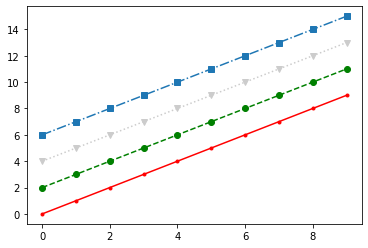

In [82]:
#matplotlib
import matplotlib.pyplot as plt

x = np.arange(10)

figure, ax = plt.subplots()

# line모양

ax.plot(x, x, linestyle='-', c='r', marker='.') # solid , red, .

ax.plot(x, x+2, linestyle='--', color='green', marker='o') # dashed

ax.plot(x, x+4, linestyle=':', color='0.8', marker='v') # dotted color는 0~1

ax.plot(x, x+6, linestyle='-.', marker='s') # dashdot

(-1.5, 1.5)

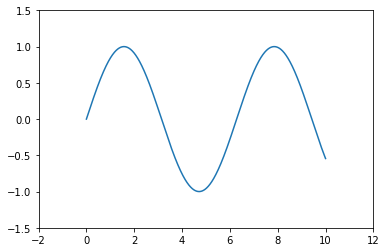

In [41]:
# 축 경계 조정하기

x = np.linspace(0,10,1000)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

ax.set_xlim(-2,12) # x축 경계 설정

ax.set_ylim(-1.5,1.5) # y축 경계 설정

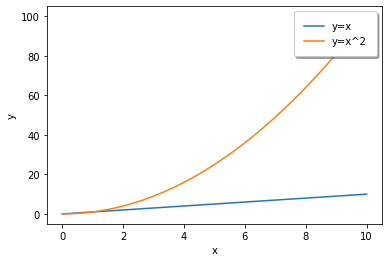

In [62]:
#범례 넣기

fig, ax = plt.subplots()

ax.plot(x,x, label='y=x')

ax.plot(x,x**2, label='y=x^2')

ax.set_xlabel('x') # x축 이름

ax.set_ylabel('y') # y축 이름

ax.legend(
    loc='upper right',
    shadow=True, #그림자
    fancybox=True, #모서리 모양을 둥글게
    borderpad=1 #범례 크기
)

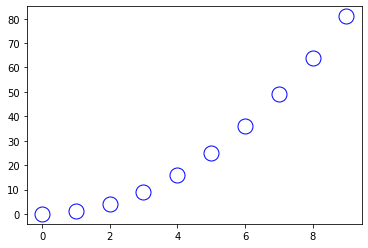

In [72]:
# 산점도

fig, ax = plt.subplots()

x = np.arange(10)

ax.plot(
    x, x**2, 'o',
    markersize=15,
    markerfacecolor='white',
    markeredgecolor='blue'
)

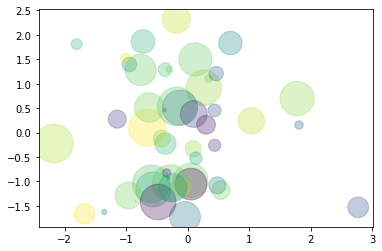

In [83]:
fig, ax = plt.subplots()
x = np.random.randn(50)
y = np.random.randn(50)
colors = np.random.randint(0,100,50)
sizes = 500 * np.pi * np.random.rand(50)**2
ax.scatter(x, y, c=colors, s=sizes, alpha=0.3) # alpha=투명도

<BarContainer object of 10 artists>

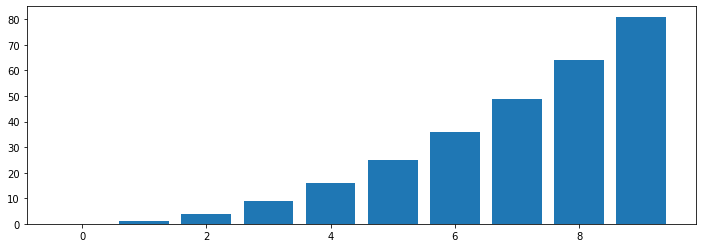

In [89]:
# Bar plot

x = np.arange(10)

fig, ax = plt.subplots(figsize=(12,4))

ax.bar(x, x**2)

[Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')]

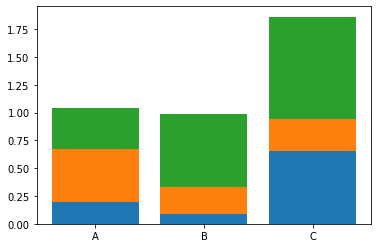

In [105]:
# bar plot 누적

x = np.random.rand(3)

y = np.random.rand(3)

z = np.random.rand(3)

data=[x,y,z]

fig, ax = plt.subplots()

x_ax = np.arange(3)
for i in x_ax :
    ax.bar(x_ax, data[i], bottom=np.sum(data[:i], axis=0))

ax.set_xticks(x_ax)

ax.set_xticklabels(['A','B','C'])

(array([ 1.,  0.,  0.,  2.,  2.,  0.,  9.,  8.,  3.,  5.,  9.,  8., 15.,
        19., 22., 28., 34., 33., 42., 41., 40., 60., 55., 61., 49., 49.,
        69., 47., 52., 32., 34., 32., 27., 27., 14., 16., 15.,  9., 11.,
         8.,  2.,  3.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.27534906, -3.13999565, -3.00464224, -2.86928883, -2.73393543,
        -2.59858202, -2.46322861, -2.32787521, -2.1925218 , -2.05716839,
        -1.92181499, -1.78646158, -1.65110817, -1.51575476, -1.38040136,
        -1.24504795, -1.10969454, -0.97434114, -0.83898773, -0.70363432,
        -0.56828092, -0.43292751, -0.2975741 , -0.16222069, -0.02686729,
         0.10848612,  0.24383953,  0.37919293,  0.51454634,  0.64989975,
         0.78525315,  0.92060656,  1.05595997,  1.19131338,  1.32666678,
         1.46202019,  1.5973736 ,  1.732727  ,  1.86808041,  2.00343382,
         2.13878722,  2.27414063,  2.40949404,  2.54484745,  2.68020085,
         2.81555426,  2.95090767,  3.08626107,  3.22161448,

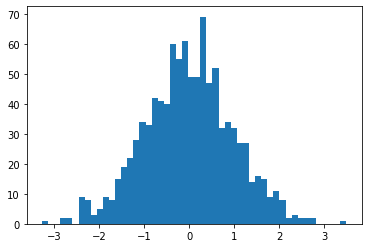

In [109]:
# histogram

fig,ax = plt.subplots()

data = np.random.randn(1000) # 1000개의 정규분포 난수를 생성함

ax.hist(data, bins=50)  #bins은 구간을 몇개로 나눌지

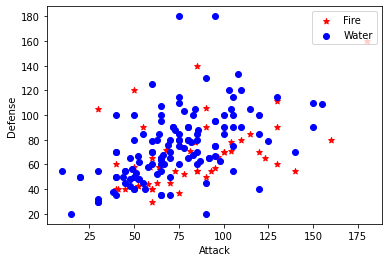

In [117]:
# pandas - matplotlib
import pandas as pd

df = pd.read_csv('pokemon.csv')

fire = df[(df['Type 1']=='Fire')|(df['Type 2']=='Fire')]
water = df[(df['Type 1']=='Water')|(df['Type 2']=='Water')]

figure, ax = plt.subplots()

ax.scatter(fire['Attack'],fire['Defense'], c='r', label='Fire', marker='*')
ax.scatter(water['Attack'],water['Defense'], c='b', label='Water')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.legend(loc='upper right')

SyntaxError: invalid syntax (2393608314.py, line 1)